# GMM



In real life, many datasets can be modeled by Gaussian Distribution (Univariate or Multivariate). So it is quite natural and intuitive to assume that the clusters come from different Gaussian Distributions. Or in other words, it is tried to model the dataset as a mixture of several Gaussian Distributions.

Suppose there are K clusters (For the sake of simplicity here it is assumed that the number of clusters is known and it is K). So \mu and \Sigma is also estimated for each k. Had it been only one distribution, they would have been estimated by maximum-likelihood method. 


1)Initialize the mean \mu_k, 
the covariance matrix \Sigma_k and 
the mixing coefficients \pi_k 
by some random values. (or other values)

2)Compute the \gamma_k values for all k.

3)Again Estimate all the parameters 
using the current \gamma_k values.

4)Compute log-likelihood function.

5)Put some convergence criterion

6)If the log-likelihood value converges to some value 
 (or if all the parameters converge to some values ) 
 then stop, 
 else return to Step 2.


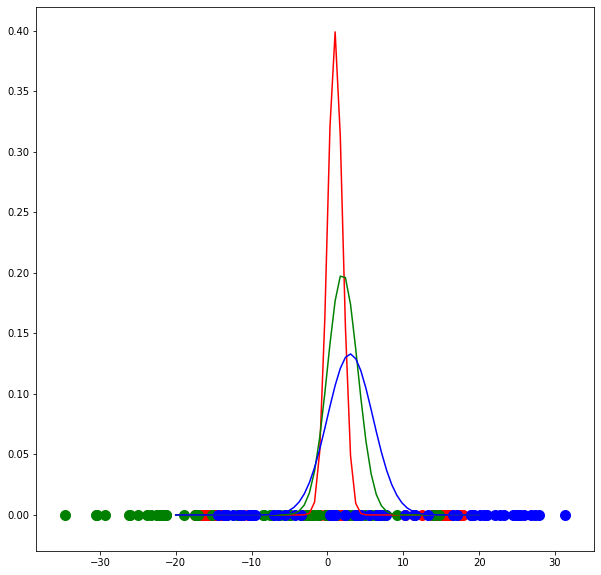

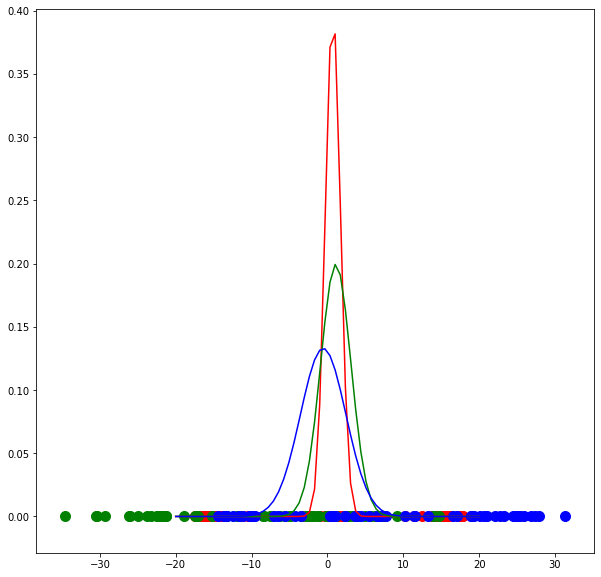

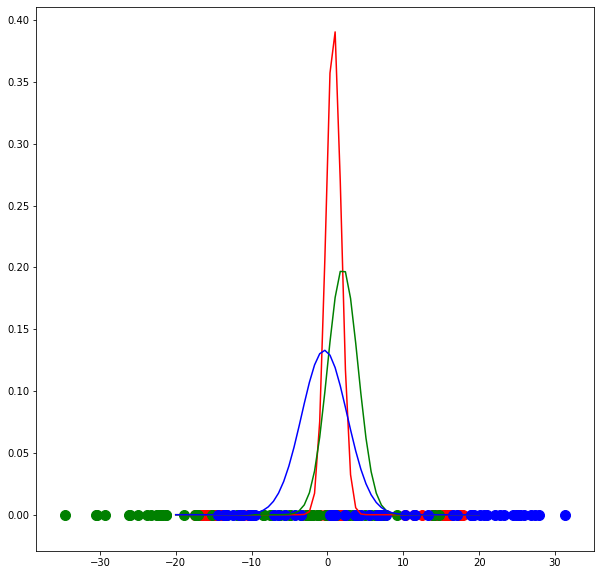

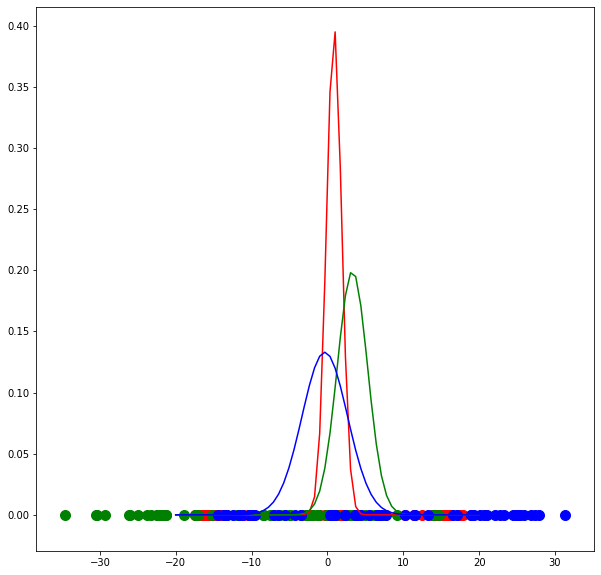

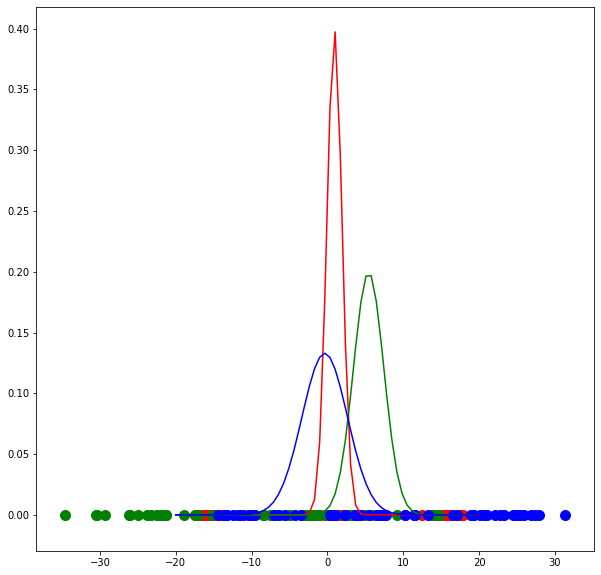

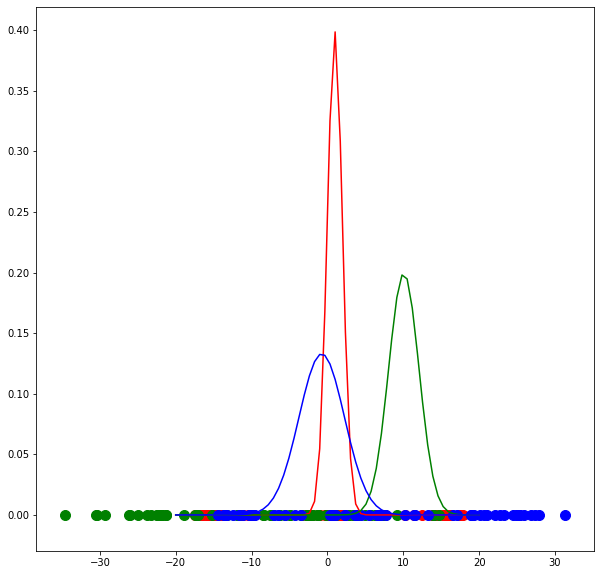

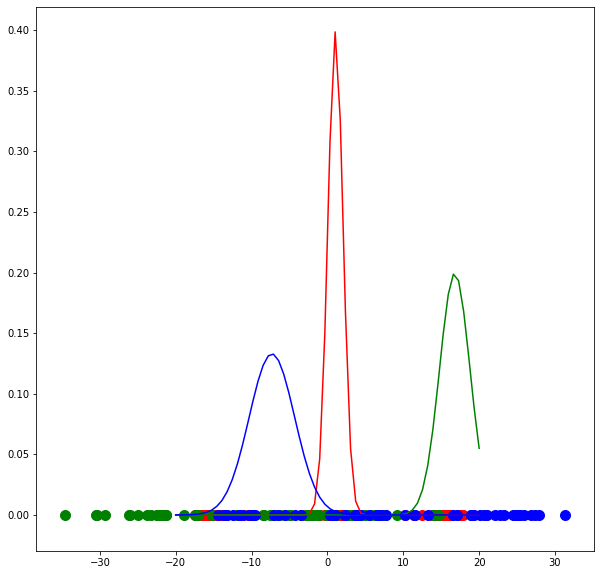

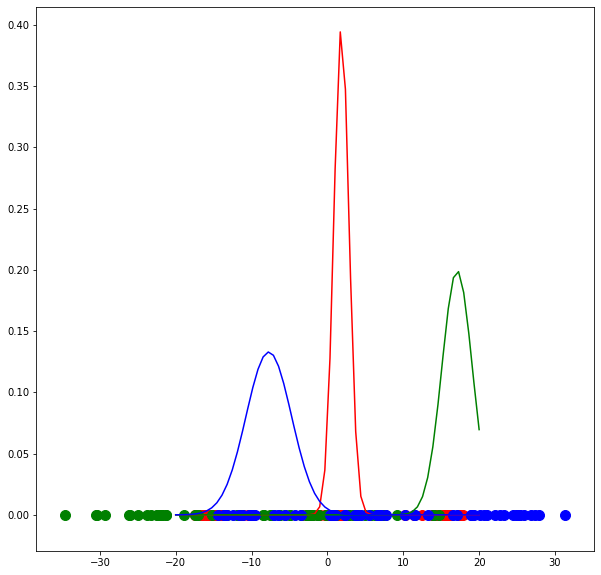

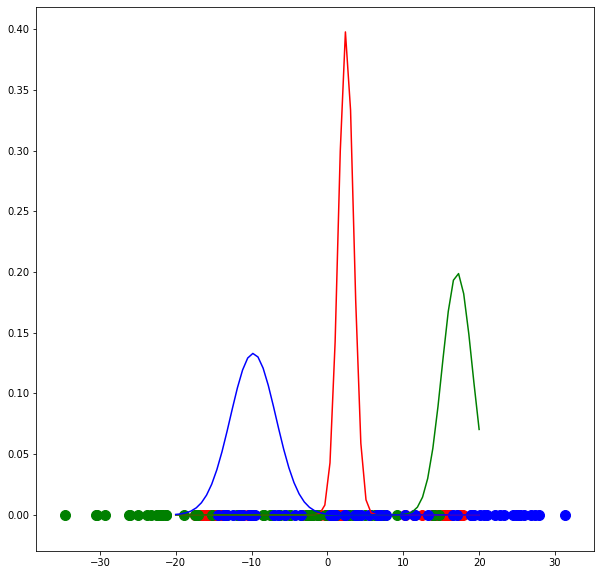

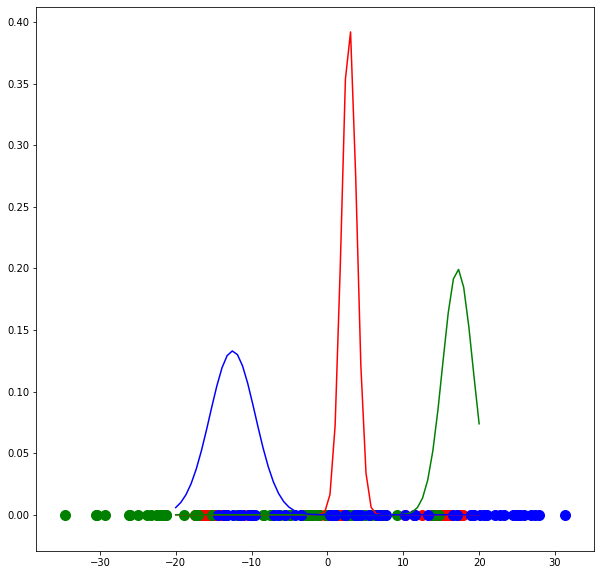

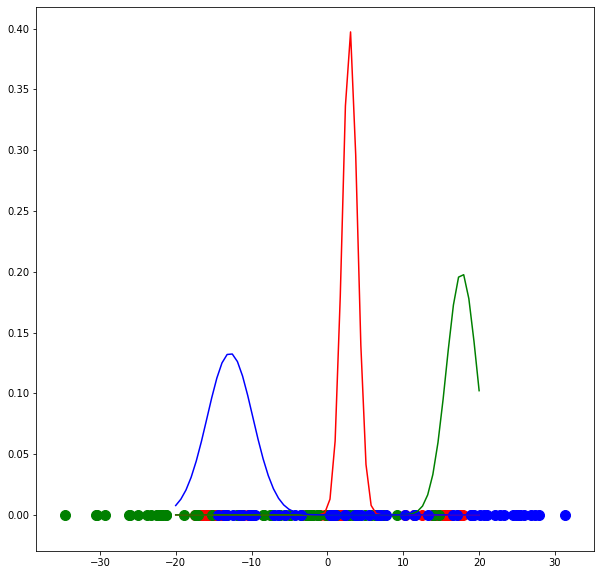

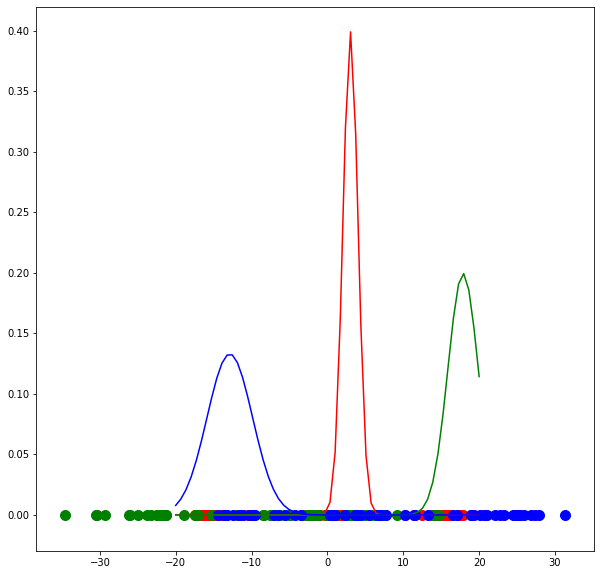

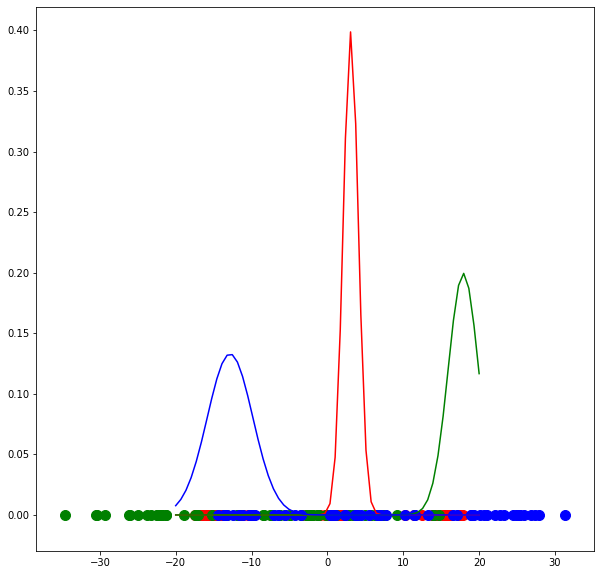

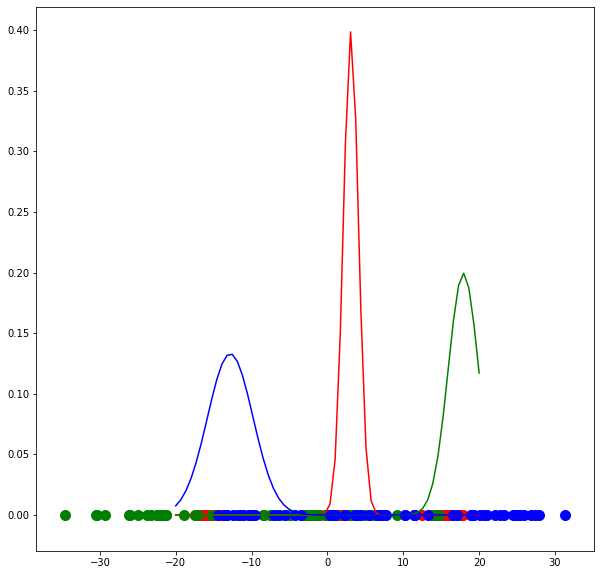

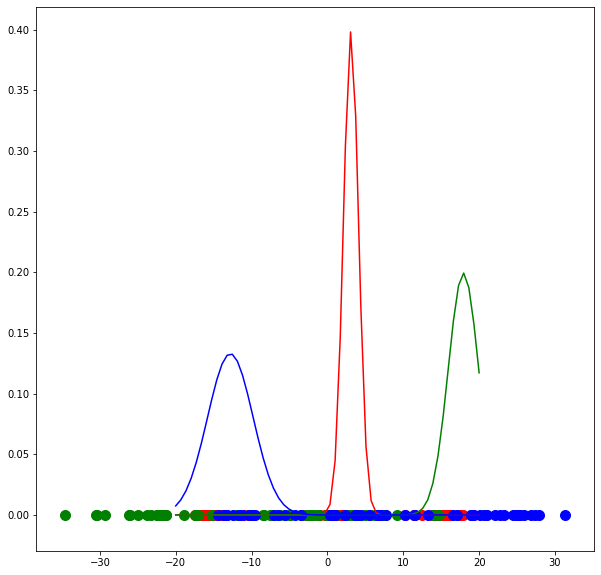

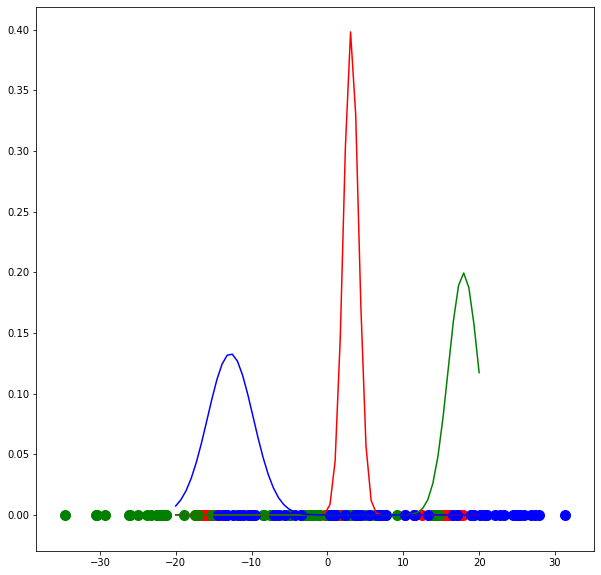

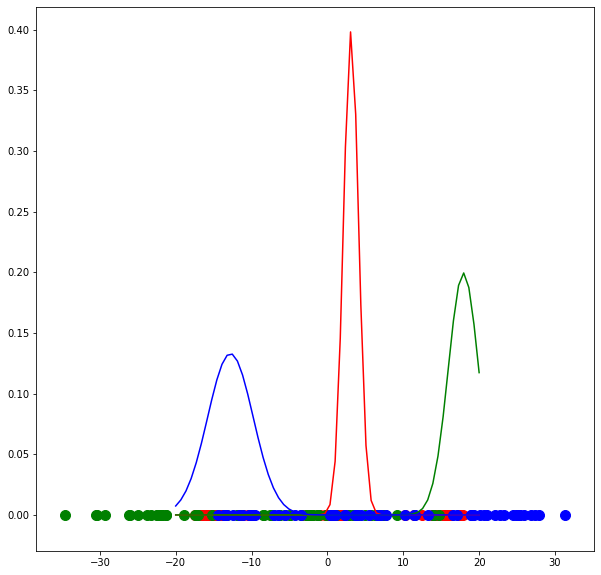

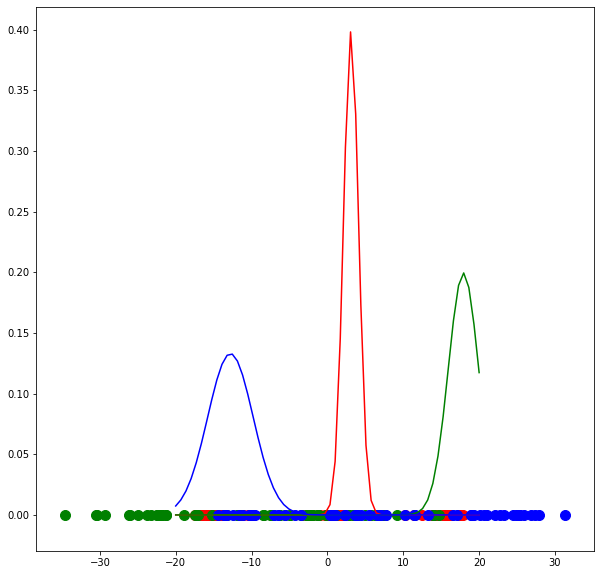

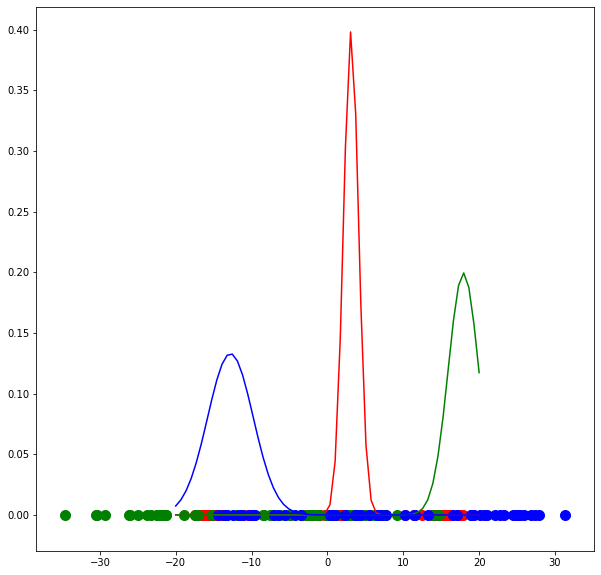

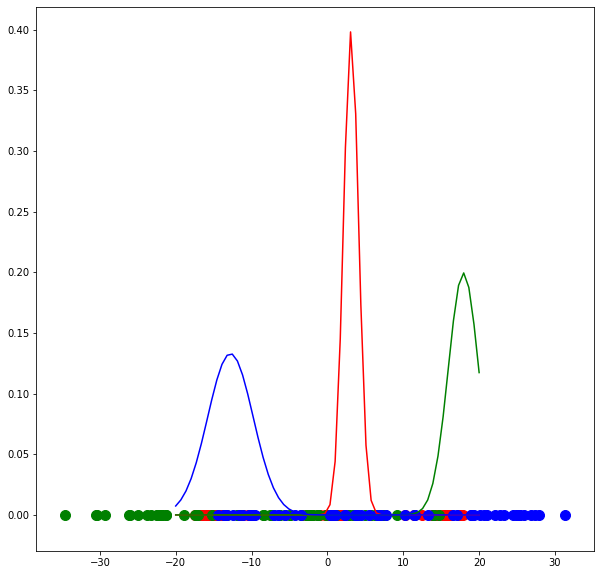

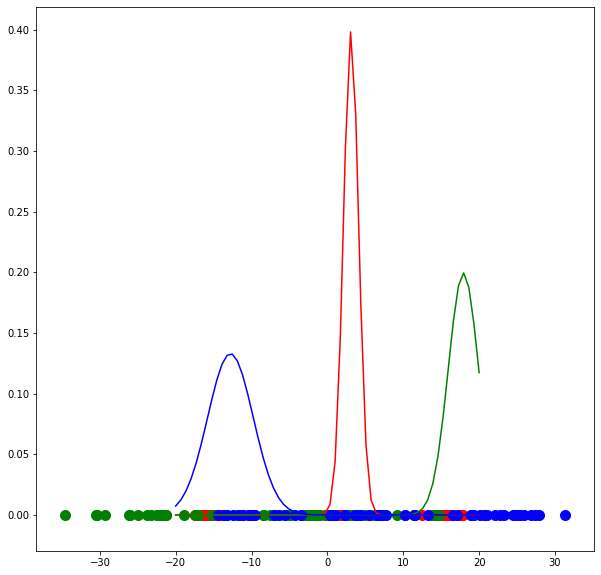

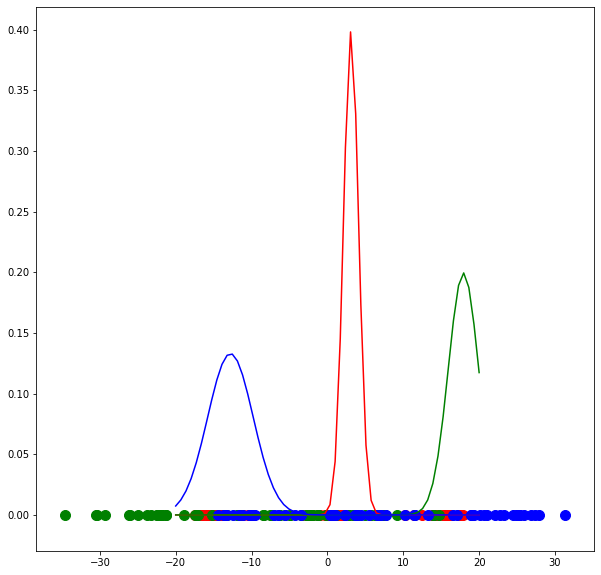

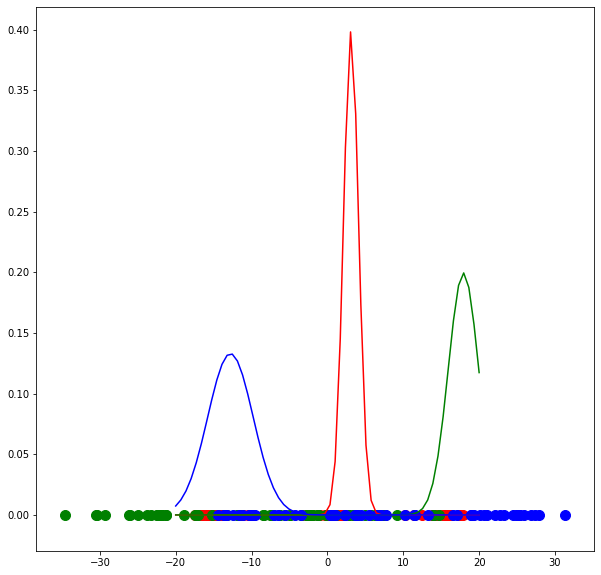

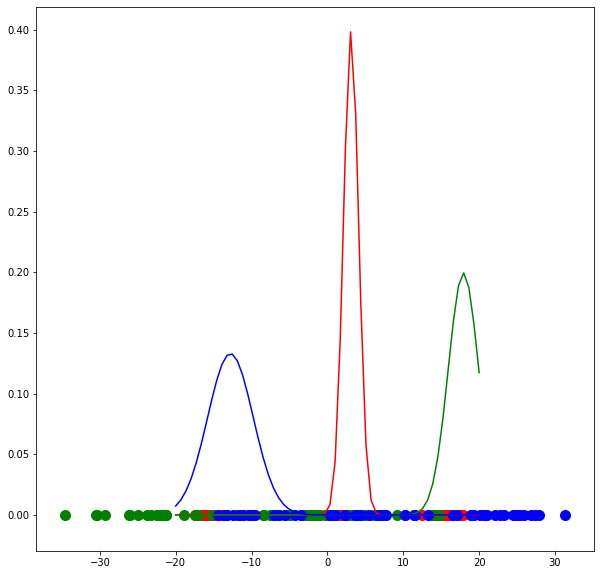

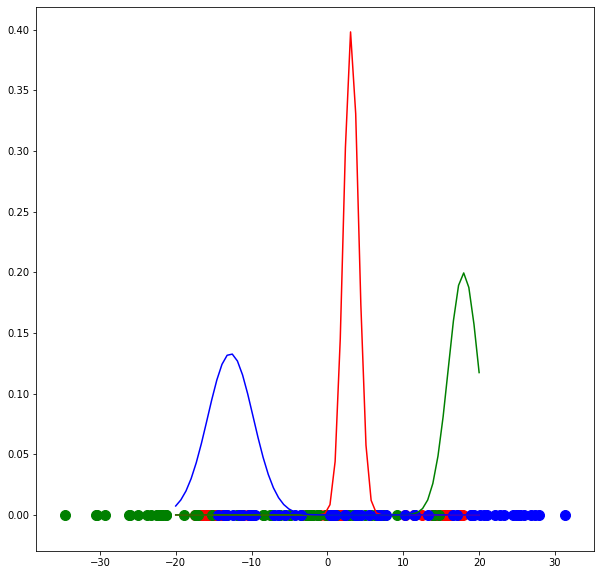

In [8]:
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger 
matplotlib_axes_logger.setLevel('ERROR')
from matplotlib import style
import numpy as np
from scipy.stats import norm
import pickle

np.random.seed(0)

def load(name):
    file = open(name,'rb')
    data = pickle.load(file)
    file.close()
    return data

def save(data,name):
    file = open(name, 'wb')
    pickle.dump(data,file)
    file.close()

class GMM1D:
    def __init__(self,X,iterations,initmean,initprob,initvariance):
        """initmean = [a,b,c] initprob=[1/3,1/3,1/3] initvariance=[d,e,f] """    
        self.iterations = iterations
        self.X = X
        self.mu = initmean
        self.pi = initprob
        self.var = initvariance
    
    """E step"""

    def calculate_prob(self,r):
        for c,g,p in zip(range(3),[norm(loc=self.mu[0],scale=self.var[0]),
                                       norm(loc=self.mu[1],scale=self.var[1]),
                                       norm(loc=self.mu[2],scale=self.var[2])],self.pi):
            r[:,c] = p*g.pdf(self.X)
        """
        Normalize the probabilities such that each row of r sums to 1 and weight it by mu_c == the fraction of points belonging to 
        cluster c
        """
        for i in range(len(r)):
        	# Write code here
            r[i] = r[i]/(np.sum(self.pi)*np.sum(r,axis=1)[i])
#             pass
        return r
    
    def plot(self,r):
        fig = plt.figure(figsize=(10,10))
        ax0 = fig.add_subplot(111)
        for i in range(len(r)):
            color=['r','g','b']
            ax0.scatter(self.X[i],0,c=color[int(i/60)],s=100)
        """Plot the gaussians"""
        for g,c in zip([norm(loc=self.mu[0],scale=self.var[0]).pdf(np.linspace(-20,20,num=60)),
                        norm(loc=self.mu[1],scale=self.var[1]).pdf(np.linspace(-20,20,num=60)),
                        norm(loc=self.mu[2],scale=self.var[2]).pdf(np.linspace(-20,20,num=60))],['r','g','b']):
            ax0.plot(np.linspace(-20,20,num=60),g,c=c)
    
    def run(self):
        
        for iter in range(self.iterations):

            """Create the array r with dimensionality nxK"""
            r = np.zeros((len(self.X),3))  

            """
            Probability for each datapoint x_i to belong to gaussian g 
            """
            r = self.calculate_prob(r)


            """Plot the data"""
            self.plot(r)
            
            """M-Step"""

            """calculate m_c"""
            m_c = []
            # write code here
            for c in range(len(r[0])):
                m = np.sum(r[:,c])
                m_c.append(m)
            
            """calculate pi_c"""
            # write code here
            for k in range(len(m_c)):
                self.pi[k] = (m_c[k]/np.sum(m_c))
            
            """calculate mu_c"""
            # write code here
            self.mu = np.sum(self.X.reshape(len(self.X),1)*r,axis=0)/m_c
#             print(r[:,1].shape)
            """calculate var_c"""
            var_c = []
            #write code here
            for c in range(len(r[0])):
                var_c.append((1/m_c[c])*np.dot(((np.array(r[:,c]).reshape(180,1))*(self.X.reshape(len(self.X),1)-self.mu[c])).T,(self.X.reshape(len(self.X),1)-self.mu[c])))
            plt.show()


data1=load("dataset1.pkl")
data2=load("dataset2.pkl")
data3=load("dataset3.pkl")
data = np.stack((data1,data2,data3)).flatten()

mean1=1
mean2=2
mean3=3
var1=1
var2=2
var3=3

g = GMM1D(data,25,[mean1,mean2,mean3],[1/3,1/3,1/3],[var1,var2,var3])
g.run()


## Check if data1 has converged or not?

In [9]:
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(covariance_type='full',max_iter=2)
labels=gmm.fit(data1)

In [10]:
print('converged?',gmm.converged_)

converged? True


## Check if data2 has converged or not?

In [12]:
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(covariance_type='full',max_iter=2)
labels=gmm.fit(data2)
print('converged?',gmm.converged_)

converged? True


## Check if data3 has converged or not?

In [13]:
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(covariance_type='full',max_iter=2)
labels=gmm.fit(data3)
print('converged?',gmm.converged_)

converged? True
